In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('encuesta_procesada.csv')

In [2]:
# Paso 2: Seleccionar y renombrar las columnas relevantes
selected_columns = [
    '1.- Datos demográficos del cliente\n¿Qué edad tiene?:',
    '2.- Género:',
    '3.- ¿Qué nivel educativo tiene?',
    '4.- ¿Cuántos miembros compone su familia?',
    '8.- ¿Qué tan preocupado está por la seguridad de sus vehículos y activos?',
    '9.- ¿Ha sido víctima de algún robo o hurto en los últimos 5 años?',
    '10.- ¿Qué le motiva a comprar un servicio de rastreo satelital?',
    '20.- ¿Prefiere comprar el rastreo satelital en efectivo o a crédito?', 
]

df = df[selected_columns]
df.columns = [
    'Edad',
    'Genero',
    'Nivel_Educativo',
    'Miembros_Familia',
    'Preocupacion por bienes',
    'Victima de Robo',
    'Motivacion para comprar rastreo',
    'Manera de compra',
]

In [3]:
df

,Edad,Genero,Nivel_Educativo,Miembros_Familia,Preocupacion por bienes,Victima de Robo,Motivacion para comprar rastreo,Manera de compra
0,25 a 35 años,Femenino,Universitario,1-3 miembros,Preocupado,No,Tranquilidad,Crédito
1,25 a 35 años,Masculino,Posgrado,4-6 miembros,Neutral,No,Seguridad,Crédito
2,35 a 44 años,Femenino,Universitario,4-6 miembros,Neutral,No,Seguridad,Efectivo
3,45 a 54 años,Masculino,Universitario,1-3 miembros,Preocupado,No,Seguridad,Efectivo
4,45 a 54 años,Femenino,Técnico,4-6 miembros,Neutral,No,Seguridad,Crédito
...,...,...,...,...,...,...,...,...
498,25 a 35 años,Masculino,Universitario,7 o más miembros,Preocupado,No,Seguridad;Tranquilidad;Control,Efectivo
499,25 a 35 años,Masculino,Posgrado,1-3 miembros,Preocupado,No,Seguridad,Crédito
500,35 a 44 años,Masculino,Técnico,1-3 miembros,Neutral,Si,Seguridad,Efectivo
501,35 a 44 años,Masculino,Universitario,4-6 miembros,Preocupado,Si,Control,Crédito


In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Codificar variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[categorical_columns])

# Normalizar los datos
scaler = StandardScaler()
normalized_data = scaler.fit_transform(encoded_data.toarray())


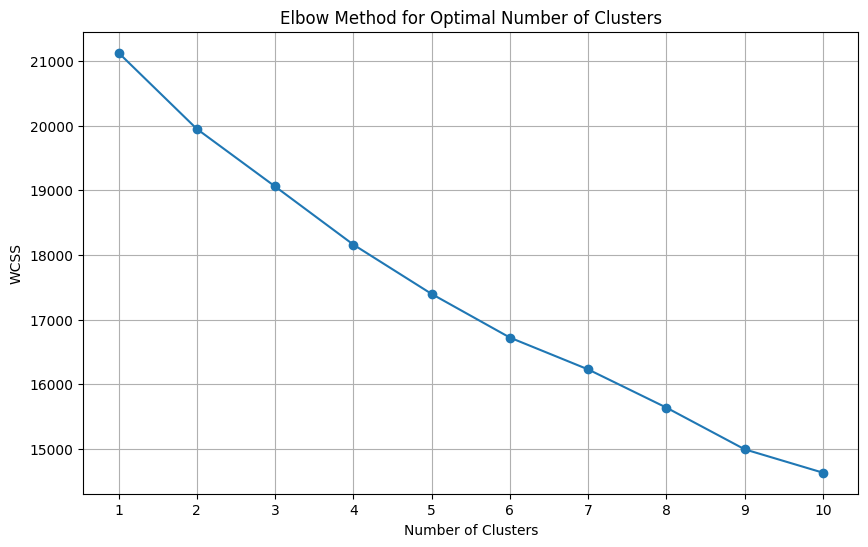

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [6]:
n_clusters=9

kmeans = KMeans(n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(normalized_data)
df['Cluster'] = clusters

In [7]:
df

,Edad,Genero,Nivel_Educativo,Miembros_Familia,Preocupacion por bienes,Victima de Robo,Motivacion para comprar rastreo,Manera de compra,Cluster
0,25 a 35 años,Femenino,Universitario,1-3 miembros,Preocupado,No,Tranquilidad,Crédito,6
1,25 a 35 años,Masculino,Posgrado,4-6 miembros,Neutral,No,Seguridad,Crédito,3
2,35 a 44 años,Femenino,Universitario,4-6 miembros,Neutral,No,Seguridad,Efectivo,3
3,45 a 54 años,Masculino,Universitario,1-3 miembros,Preocupado,No,Seguridad,Efectivo,1
4,45 a 54 años,Femenino,Técnico,4-6 miembros,Neutral,No,Seguridad,Crédito,3
...,...,...,...,...,...,...,...,...,...
498,25 a 35 años,Masculino,Universitario,7 o más miembros,Preocupado,No,Seguridad;Tranquilidad;Control,Efectivo,5
499,25 a 35 años,Masculino,Posgrado,1-3 miembros,Preocupado,No,Seguridad,Crédito,1
500,35 a 44 años,Masculino,Técnico,1-3 miembros,Neutral,Si,Seguridad,Efectivo,3
501,35 a 44 años,Masculino,Universitario,4-6 miembros,Preocupado,Si,Control,Crédito,5


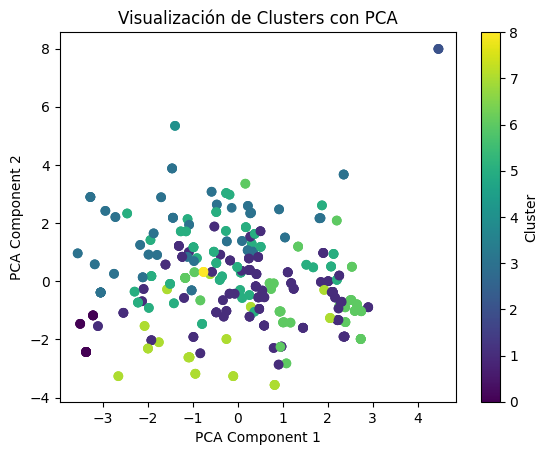

In [8]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad para visualización
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_data)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualización de Clusters con PCA')
plt.colorbar(label='Cluster')
plt.show()

In [9]:
# Calcular la importancia de cada variable en cada cluster
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_means = df.groupby('Cluster')[numeric_columns].mean()
overall_means = df[numeric_columns].mean()
importance = np.abs(cluster_means - overall_means)

In [10]:
# Calcular la frecuencia de cada valor dentro de cada cluster
for column in df.columns:
    if column != 'Cluster':
        value_counts = df.groupby(['Cluster', column])[column].count()
        print(f"Valores en '{column}':\n{value_counts}\n")


Valores en 'Edad':
Cluster  Edad           
0        45 a 54 años       17
1        25 a 35 años       36
         35 a 44 años       82
         45 a 54 años       54
         55 a 64 años        9
         Mayor a 65 años     3
2        55 a 64 años        3
3        25 a 35 años       16
         35 a 44 años       15
         45 a 54 años       51
         55 a 64 años        2
4        35 a 44 años        2
5        25 a 35 años       18
         35 a 44 años       50
         45 a 54 años       24
         55 a 64 años        6
6        25 a 35 años       37
         35 a 44 años       20
         45 a 54 años       10
         55 a 64 años        5
7        25 a 35 años        4
         35 a 44 años       22
         45 a 54 años       14
8        45 a 54 años        3
Name: Edad, dtype: int64

Valores en 'Genero':
Cluster  Genero   
0        Masculino     17
1        Femenino      81
         Masculino    103
2        Femenino       3
3        Femenino      20
         Masculi

In [12]:
# Combinar información de importancia y frecuencia
for cluster in range(6):
    print(f"\nCluster {cluster}:")
    sorted_importance = importance.loc[cluster].sort_values(ascending=False)
    for variable in sorted_importance.index:
        print(f"Variable: {variable}, Importancia: {sorted_importance[variable]}")
        
        # Obtener los valores más relevantes para esa variable
        value_counts = df.groupby(['Cluster', variable])[variable].count().loc[cluster]
        most_frequent_values = value_counts.sort_values(ascending=False).index[:3]  # Top 3 valores más frecuentes
        
        print(f"Valores más relevantes: {most_frequent_values}")



Cluster 0:
Variable: Cluster, Importancia: 1.228628230616302
Valores más relevantes: Index([0], dtype='int32', name='Cluster')

Cluster 1:
Variable: Cluster, Importancia: 0.2286282306163021
Valores más relevantes: Index([1], dtype='int32', name='Cluster')

Cluster 2:
Variable: Cluster, Importancia: 0.7713717693836979
Valores más relevantes: Index([2], dtype='int32', name='Cluster')

Cluster 3:
Variable: Cluster, Importancia: 1.771371769383698
Valores más relevantes: Index([3], dtype='int32', name='Cluster')

Cluster 4:
Variable: Cluster, Importancia: 2.771371769383698
Valores más relevantes: Index([4], dtype='int32', name='Cluster')

Cluster 5:
Variable: Cluster, Importancia: 3.771371769383698
Valores más relevantes: Index([5], dtype='int32', name='Cluster')


In [13]:
import numpy as np

# Analizar las características más relevantes de cada cluster
# Filtrar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_means = df.groupby('Cluster')[numeric_columns].mean()
print(cluster_means)


         Cluster
Cluster         
0            0.0
1            1.0
2            2.0
3            3.0
4            4.0
5            5.0


In [15]:
# Evaluar la importancia de las variables en cada cluster
for column in numeric_columns:
    cluster_means = df.groupby('Cluster')[column].mean()
    overall_mean = df[column].mean()
    relevance = np.abs(cluster_means - overall_mean)
    print(f'Variable: {column}, Relevancia: {relevance}')

Variable: Cluster, Relevancia: Cluster
0    1.228628
1    0.228628
2    0.771372
3    1.771372
4    2.771372
5    3.771372
Name: Cluster, dtype: float64
